In [1]:
from matplotlib import pyplot as plt
import numpy as np

[{(4, 1): 0.3237, (4, 2): 0.3308, (4, 3): 0.3238, (5, 1): 0.3218, (5, 2): 0.3208, (5, 3): 0.3124, (6, 1): 0.3207, (6, 2): 0.3218, (6, 3): 0.3163, (7, 1): 0.3231, (7, 2): 0.3188, (7, 3): 0.3224, (8, 1): 0.3186, (8, 2): 0.3234, (8, 3): 0.3271, (9, 1): 0.3166, (9, 2): 0.3208, (9, 3): 0.3215, (10, 1): 0.3194, (10, 2): 0.3218, (10, 3): 0.3171, (11, 1): 0.3165, (11, 2): 0.3161, (11, 3): 0.3235, (12, 1): 0.3148, (12, 2): 0.317, (12, 3): 0.3174}, {(4, 1): 0.322, (4, 2): 0.3229, (4, 3): 0.3144, (5, 1): 0.3231, (5, 2): 0.3304, (5, 3): 0.3245, (6, 1): 0.3296, (6, 2): 0.3231, (6, 3): 0.3265, (7, 1): 0.3235, (7, 2): 0.3296, (7, 3): 0.3228, (8, 1): 0.3225, (8, 2): 0.3298, (8, 3): 0.3287, (9, 1): 0.3234, (9, 2): 0.3341, (9, 3): 0.3338, (10, 1): 0.3256, (10, 2): 0.3263, (10, 3): 0.3238, (11, 1): 0.3168, (11, 2): 0.3304, (11, 3): 0.3334, (12, 1): 0.3179, (12, 2): 0.3171, (12, 3): 0.3288}, {(4, 1): 0.321, (4, 2): 0.3157, (4, 3): 0.3156, (5, 1): 0.309, (5, 2): 0.3224, (5, 3): 0.315, (6, 1): 0.3208, (6, 2

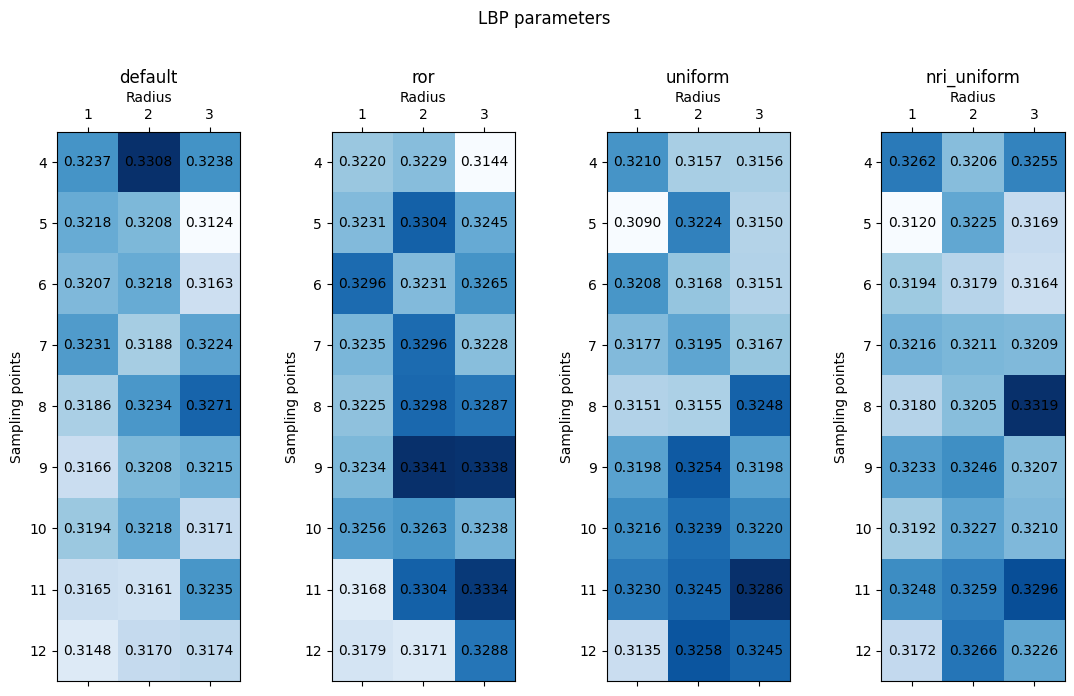

In [2]:
types = ["default", "ror", "uniform", "nri_uniform"]
with open("raw_lbp.txt") as f:
    
    data = list(map(lambda x: [ types.index(x[2]) ] + x[:2] + [x[3]], [ line.split()[1::2] for line in f]))
    processed = [{} for _ in range(4)]
    for d in data:
        processed[d[0]][(int(d[1]), int(d[2]))] = float(d[3])
    print(processed)

    # Create a figure and a set of subplots
    fig, axs = plt.subplots(1, 4, figsize=(13, 13))

    fig.suptitle("LBP parameters",  y=0.80)


    for i in range(4):
        matrix = np.array([[processed[i].get((j, k), 0) for k in range(1, 4)] for j in range(4, 13)])

        # Display the first matrix on the first subplot
        cax1 = axs[i].matshow(matrix, cmap=plt.cm.Blues)
        axs[i].set_title(types[i])
        axs[i].set_xticks(np.arange(matrix.shape[1]))
        axs[i].set_yticks(np.arange(matrix.shape[0]))
        axs[i].set_xticklabels(np.arange(1, matrix.shape[1] + 1))
        axs[i].set_yticklabels(np.arange(4, matrix.shape[0] + 4))
        
        axs[i].set_xlabel("Radius")
        axs[i].xaxis.set_label_position('top')  # Move x-axis label to top

        axs[i].set_ylabel("Sampling points")

        # Add text to each cell of the first matrix
        for j in range(matrix.shape[0]):
            for k in range(matrix.shape[1]):
                axs[i].text(k, j, f'{matrix[j, k]:.4f}', ha='center', va='center', color='black', fontsize=10)

        # Add padding between subplots
        plt.subplots_adjust(wspace=0.5)


    plt.show()


In [3]:
def process_data(d):
    return list(map(lambda x: float(x.split()[1].strip("%")), d.strip().split("\n")))

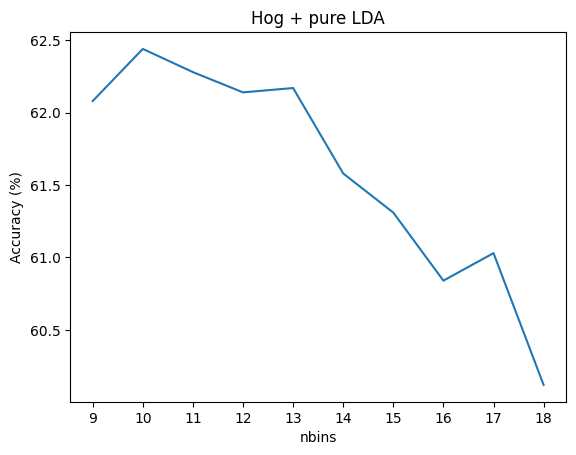

In [4]:
# Method - Hog + pure LDA

# Parameter to be tuned - nbins
# 9: 62.08
# 10: 62.44
# 11: 62.28
# 12: 62.14
# 13: 62.17
# 14: 61.58
# 15: 61.31
# 16: 60.84
# 17: 61.03
# 18: 60.12

data = """9: 62.08
10: 62.44
11: 62.28
12: 62.14
13: 62.17
14: 61.58
15: 61.31
16: 60.84
17: 61.03
18: 60.12"""

processed = process_data(data)

plt.title("Hog + pure LDA")
plt.plot(range(9, 19), processed)
plt.xticks(range(9, 19))
plt.xlabel("nbins")
plt.ylabel("Accuracy (%)")

plt.show()


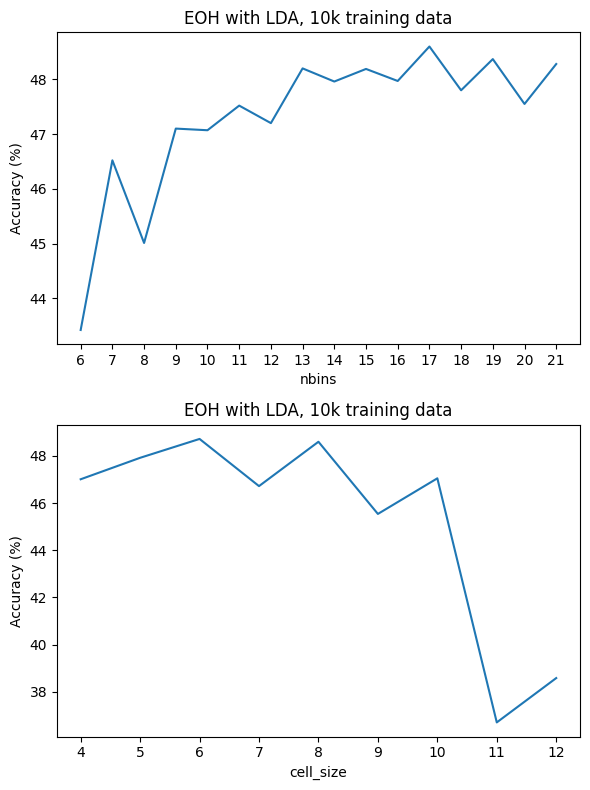

In [5]:
# eoh (edge oriented histogram, as usual, lda + 10k train data):

# nbins:
# 6: 43.42%
# 7: 46.52%
# 8: 45.01%
# 9: 47.1%
# 10: 47.07%
# 11: 47.52%
# 12: 47.2%
# 13: 48.2%
# 14: 47.96%
# 15: 48.19%
# 16: 47.97%
# 17: 48.6%
# 18: 47.8%
# 19: 48.37%
# 20: 47.55%
# 21: 48.28%

# cell_size (nbins=17)
# 4: 47.01%
# 5: 47.92%
# 6: 48.72%
# 7: 46.72%
# 8: 48.6%
# 9: 45.54%
# 10: 47.05%
# 11: 36.7%
# 12: 38.58%

data = """6: 43.42%
7: 46.52%
8: 45.01%
9: 47.1%
10: 47.07%
11: 47.52%
12: 47.2%
13: 48.2%
14: 47.96%
15: 48.19%
16: 47.97%
17: 48.6%
18: 47.8%
19: 48.37%
20: 47.55%
21: 48.28%"""

data2 = """4: 47.01%
5: 47.92%
6: 48.72%
7: 46.72%
8: 48.6%
9: 45.54%
10: 47.05%
11: 36.7%
12: 38.58%"""

processed = process_data(data)
processed2 = process_data(data2)

fig, axs = plt.subplots(2, 1, figsize=(6, 8))

axs[0].plot(range(6, 22), processed)
axs[0].set_xticks(range(6, 22))
axs[0].set_xlabel("nbins")
axs[0].set_ylabel("Accuracy (%)")
axs[0].set_title("EOH with LDA, 10k training data")

axs[1].plot(range(4, 13), processed2)
axs[1].set_xticks(range(4, 13))
axs[1].set_xlabel("cell_size")
axs[1].set_ylabel("Accuracy (%)")
axs[1].set_title("EOH with LDA, 10k training data")

plt.tight_layout()
plt.show()


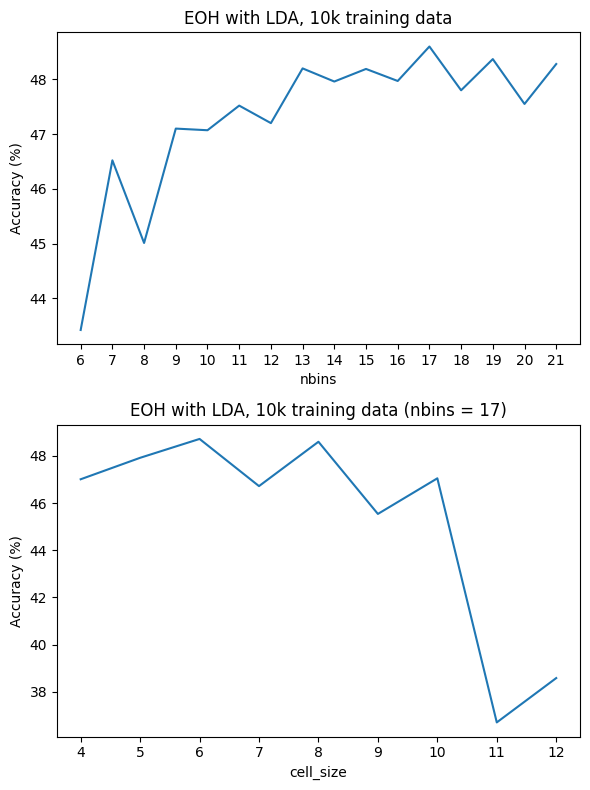

In [10]:
# eoh (edge oriented histogram, as usual, lda + 10k train data):

# nbins:
# 6: 43.42%
# 7: 46.52%
# 8: 45.01%
# 9: 47.1%
# 10: 47.07%
# 11: 47.52%
# 12: 47.2%
# 13: 48.2%
# 14: 47.96%
# 15: 48.19%
# 16: 47.97%
# 17: 48.6%
# 18: 47.8%
# 19: 48.37%
# 20: 47.55%
# 21: 48.28%

# cell_size (nbins=17)
# 4: 47.01%
# 5: 47.92%
# 6: 48.72%
# 7: 46.72%
# 8: 48.6%
# 9: 45.54%
# 10: 47.05%
# 11: 36.7%
# 12: 38.58%

data = """6: 43.42%
7: 46.52%
8: 45.01%
9: 47.1%
10: 47.07%
11: 47.52%
12: 47.2%
13: 48.2%
14: 47.96%
15: 48.19%
16: 47.97%
17: 48.6%
18: 47.8%
19: 48.37%
20: 47.55%
21: 48.28%"""

data2 = """4: 47.01%
5: 47.92%
6: 48.72%
7: 46.72%
8: 48.6%
9: 45.54%
10: 47.05%
11: 36.7%
12: 38.58%"""

processed = process_data(data)
processed2 = process_data(data2)

fig, axs = plt.subplots(2, 1, figsize=(6, 8))

axs[0].plot(range(6, 22), processed)
axs[0].set_xticks(range(6, 22))
axs[0].set_xlabel("nbins")
axs[0].set_ylabel("Accuracy (%)")
axs[0].set_title("EOH with LDA, 10k training data")

axs[1].plot(range(4, 13), processed2)
axs[1].set_xticks(range(4, 13))
axs[1].set_xlabel("cell_size")
axs[1].set_ylabel("Accuracy (%)")
axs[1].set_title("EOH with LDA, 10k training data (nbins = 17)")

plt.tight_layout()
plt.show()


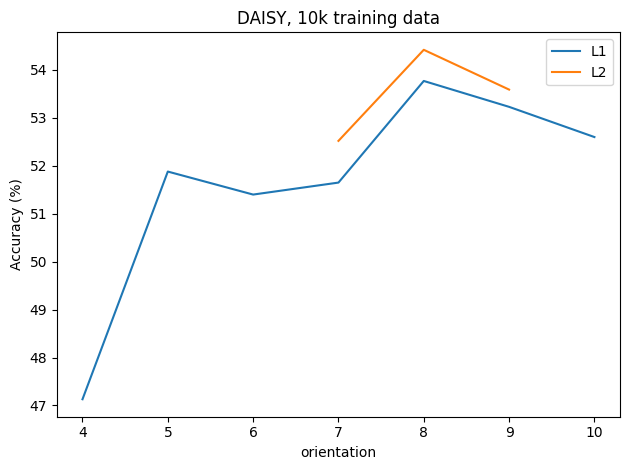

In [7]:
data = """4: 47.13%
5: 51.88%
6: 51.4%
7: 51.65%
8: 53.77%
9: 53.23%
10: 52.6%"""

data2 = """7: 52.52%
8: 54.42%
9: 53.59%"""

processed = process_data(data)
processed2 = process_data(data2)

# fig, axs = plt.subplots(2, 1, figsize=(6, 8))

plt.plot(range(4, 11), processed, label="L1")
plt.plot(range(7, 10), processed2, label="L2")
plt.xticks(range(4, 11))
plt.xlabel("orientation")
plt.ylabel("Accuracy (%)")
plt.title("DAISY, 10k training data")

plt.legend()  # Display the labels

plt.tight_layout()
plt.show()




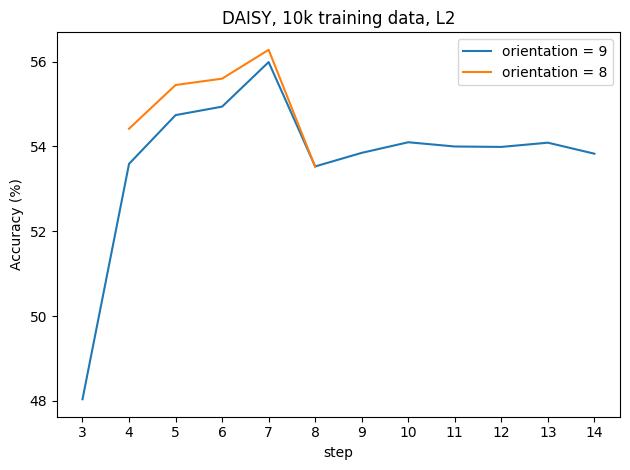

In [8]:
# step (l2 + orientation=9):
data = """3: 48.04%
4: 53.59%
5: 54.74%
6: 54.94%
7: 55.99%
8: 53.53%
9: 53.85%
10: 54.1%
11: 54%
12: 53.99%
13: 54.09%
14: 53.83%"""

# step (l2 + orientation=8):
data2 = """4: 54.42%
5: 55.45%
6: 55.6%
7: 56.28%
8: 53.52%
"""

processed = process_data(data)
processed2 = process_data(data2)

plt.plot(range(3, 15), processed, label="orientation = 9")
plt.plot(range(4, 9), processed2, label="orientation = 8")
plt.xticks(range(3, 15))
plt.xlabel("step")
plt.ylabel("Accuracy (%)")
plt.title("DAISY, 10k training data, L2")

plt.legend()  # Display the labels

plt.tight_layout()
plt.show()




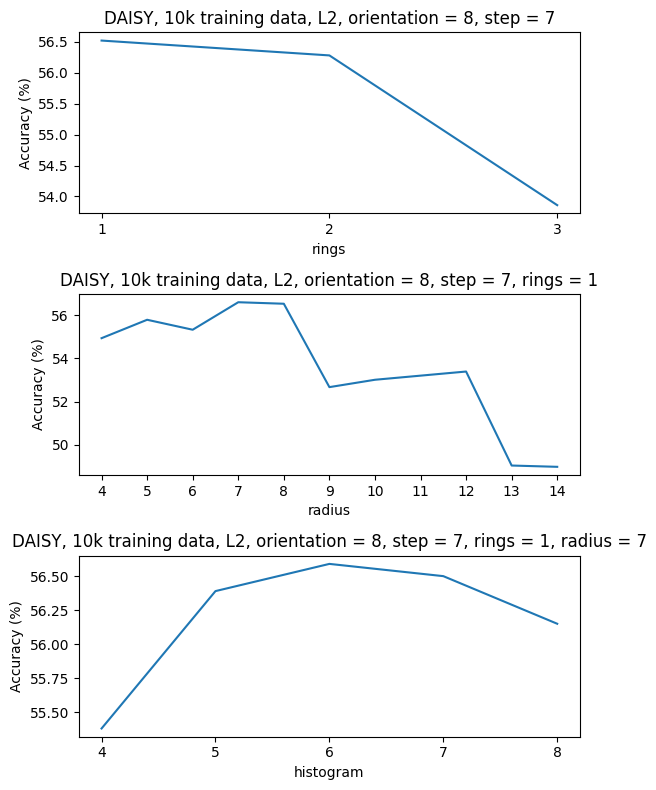

In [9]:
data = """1: 56.52%
2: 56.28%
3: 53.86%"""

data2 = """4: 54.93%
5: 55.78%
6: 55.32%
7: 56.59%
8: 56.52%
9: 52.67%
10: 53.01%
11: 53.2%
12: 53.39%
13: 49.05%
14: 48.99%"""

data3 = """4: 55.38%
5: 56.39%
6: 56.59%
7: 56.5%
8: 56.15%"""

processed = process_data(data)
processed2 = process_data(data2)
processed3 = process_data(data3)

fig, axs = plt.subplots(3, 1, figsize=(6, 8))

axs[0].plot(range(1, 4), processed)
axs[0].set_xticks(range(1, 4))
axs[0].set_xlabel("rings")
axs[0].set_ylabel("Accuracy (%)")
axs[0].set_title("DAISY, 10k training data, L2, orientation = 8, step = 7")

axs[1].plot(range(4, 15), processed2)
axs[1].set_xticks(range(4, 15))
axs[1].set_xlabel("radius")
axs[1].set_ylabel("Accuracy (%)")
axs[1].set_title("DAISY, 10k training data, L2, orientation = 8, step = 7, rings = 1")

axs[2].plot(range(4, 9), processed3)
axs[2].set_xticks(range(4, 9))
axs[2].set_xlabel("histogram")
axs[2].set_ylabel("Accuracy (%)")
axs[2].set_title("DAISY, 10k training data, L2, orientation = 8, step = 7, rings = 1, radius = 7")


plt.tight_layout()
plt.show()


# rings (l2 + orientation=8 + step=7):


# radius (l2 + orientation=8 + step=7 + rings=1):


# histogram (l2 + orientation=8 + step=7 + rings=1 + radius=7):
